In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Image visualization

Tool for loading `RAW` and original pictures

In [7]:
RAW = "images/Raw/"
ORIGINAL = "images/Original/"

In [33]:
def show_dual(img1, img2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,10))
    ax1.imshow(img1,  cmap = 'gray')
    ax2.imshow(img2)
    fig.show()

def show_dual_rgb(img1, img2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,10))
    ax1.imshow(img1)
    ax2.imshow(img2)
    fig.show()

## 1

/tmp/ipykernel_12213/3874600680.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


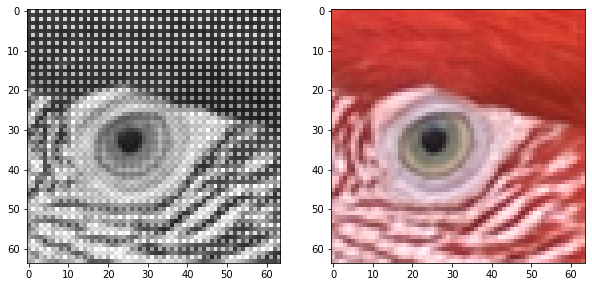

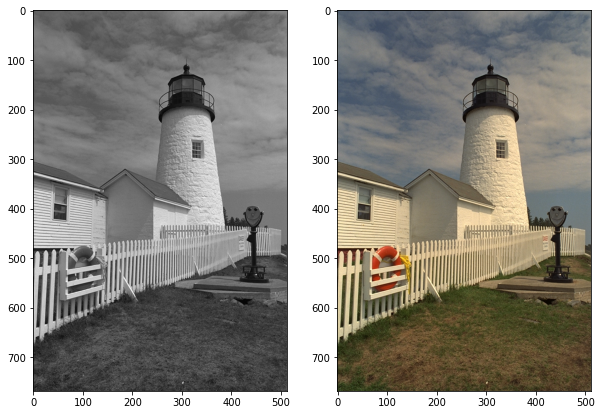

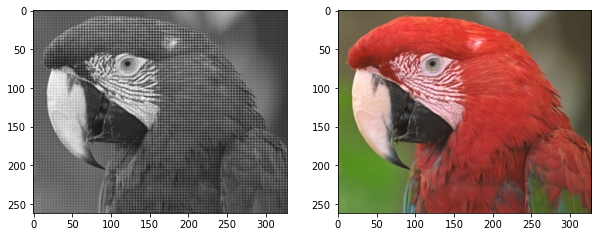

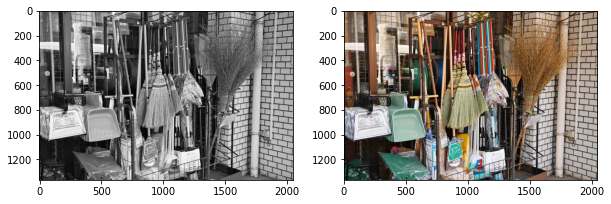

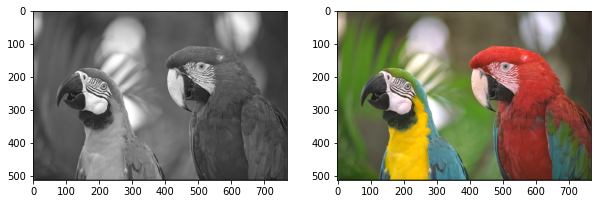

In [34]:
raw_im = os.listdir(RAW)
org_im = os.listdir(ORIGINAL)
for im1, im2 in zip(raw_im, org_im):
    tmp_r = cv2.imread(RAW + im1)
    tmp_o = cv2.imread(ORIGINAL + im2)
    show_dual(tmp_r, tmp_o[:,:,::-1])

## 2

In [54]:
def raw_rgb(img):
    new = np.zeros((img.shape[0], img.shape[1], 3), dtype = np.uint8)
    new[::2,1::2,0] = img[::2,1::2]
    new[::2,::2,1] = img[::2,::2] 
    new[1::2,1::2,1] =  img[1::2, 1::2]
    new[1::2,::2,2] = img[1::2, ::2]
    return new

/tmp/ipykernel_12213/3874600680.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


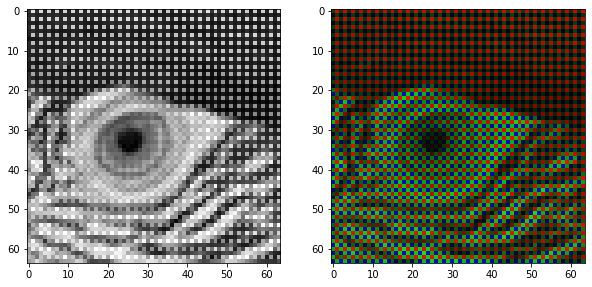

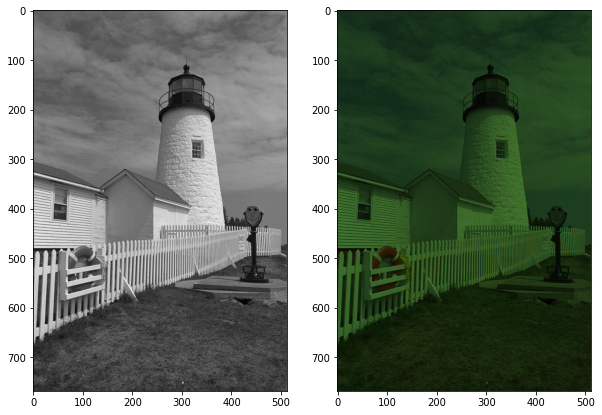

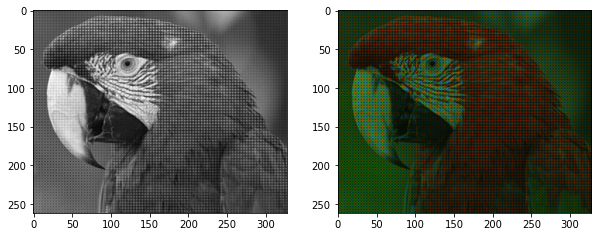

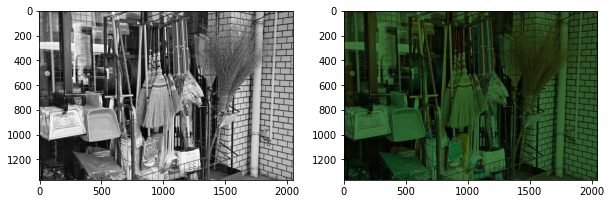

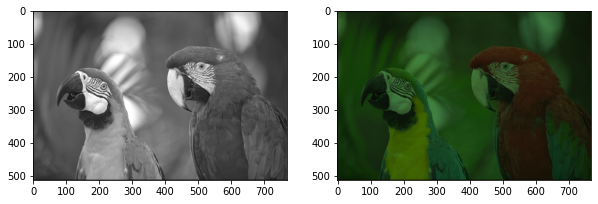

In [55]:
raw_im = os.listdir(RAW)
org_im = os.listdir(ORIGINAL)
for im1, im2 in zip(raw_im, org_im):
    tmp_r = cv2.imread(RAW + im1, cv2.IMREAD_UNCHANGED)
    new = raw_rgb(tmp_r)
    show_dual(tmp_r,new)
    

## 3

In [56]:
def fill_rgb(img):
    new = raw_rgb(img)

    new[::2,::2, 0] = new[::2,1::2,0]
    new[1::2,1::2, 0] = new[::2,1::2,0]
    new[1::2,::2, 0] = new[::2,1::2,0]

    new[::2,1::2,1] = new[::2,::2, 1] 
    new[1::2, ::2, 1] = new[1::2, 1::2, 1]

    new[1::2, 1::2, 2] = new[1::2, ::2, 2]
    new[::2, ::2, 2] = new[1::2, ::2, 2]
    new[::2, 1::2, 2] = new[1::2, ::2, 2]

    return new
    

/tmp/ipykernel_12213/3874600680.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


ValueError: could not broadcast input array from shape (683,1024) into shape (682,1024)

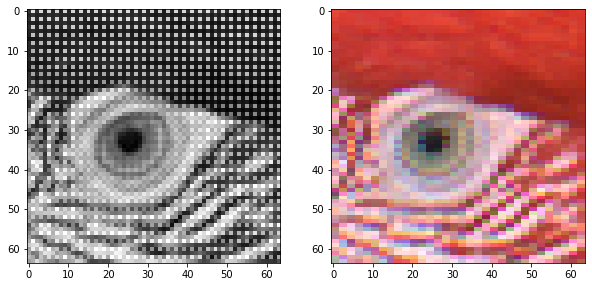

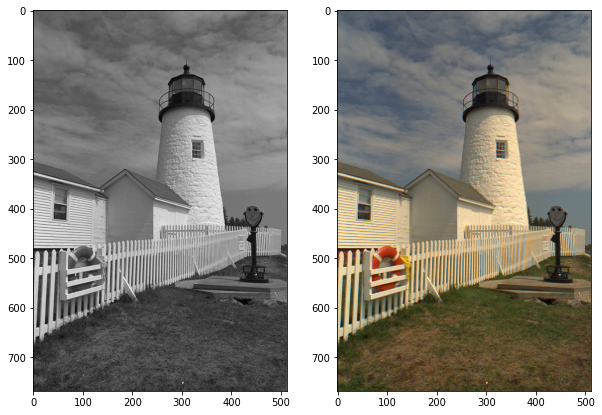

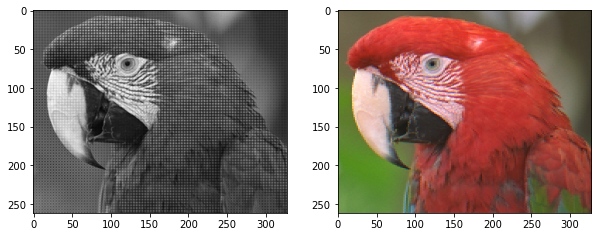

In [57]:
raw_im = os.listdir(RAW)
org_im = os.listdir(ORIGINAL)
for im1, im2 in zip(raw_im, org_im):
    tmp_r = cv2.imread(RAW + im1, cv2.IMREAD_UNCHANGED)
    new = fill_rgb(tmp_r)
    show_dual(tmp_r,new)

## 4